# Examples of different grids and meshing strategies



In [1]:
import numpy as np
import porepy as pp

/home/haakon/anaconda3/lib/python3.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:753: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


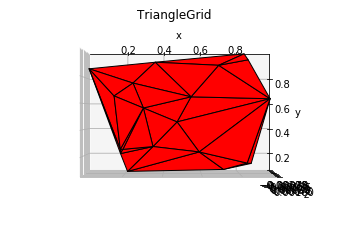

In [2]:
# Test:
p = np.random.rand(2,20)
g2 = pp.TriangleGrid(p)
pp.plot_grid(g2)

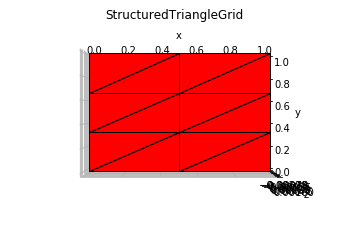

In [3]:
# Test:
nx = np.array([2, 3])
physdims = np.ones(2)
p = np.random.rand(2,20)
g3 = pp.simplex.StructuredTriangleGrid(nx, physdims)
pp.plot_grid(g3)

In [4]:
def example_mesh(mesh_size_frac, mesh_size_bound, mesh_size_min):
    # First, define 2D coordinates of fracture vertices (np.ndarray: 2 x n)
    p = np.array([[0, 2, 1, 1], [0, 0, 0, 1]])
    # Connect the endpoints of fracture vertices by an index mapping (np.ndarray: 2 x num_fracs)
    e = np.array([[0, 2], [1, 3]])

    # Set domain boundaries
    domain = {'xmin': -2, 'xmax': 3, 'ymin': -2, 'ymax': 3}

    # Deine a fracture network in 2D
    network_2d = pp.FractureNetwork2d(p, e, domain)

    # Set preferred mesh size near the fracture and at the boundary
    mesh_args = {'mesh_size_frac': mesh_size_frac, 
                 'mesh_size_bound': mesh_size_bound,
                 'mesh_size_min': mesh_size_min}

    # Generate a mixed-dimensional mesh
    gb = network_2d.mesh(mesh_args)
    
    for g, d in gb:
        d[pp.STATE] = {"dimension": g.dim * np.ones(g.num_cells)}

    return gb

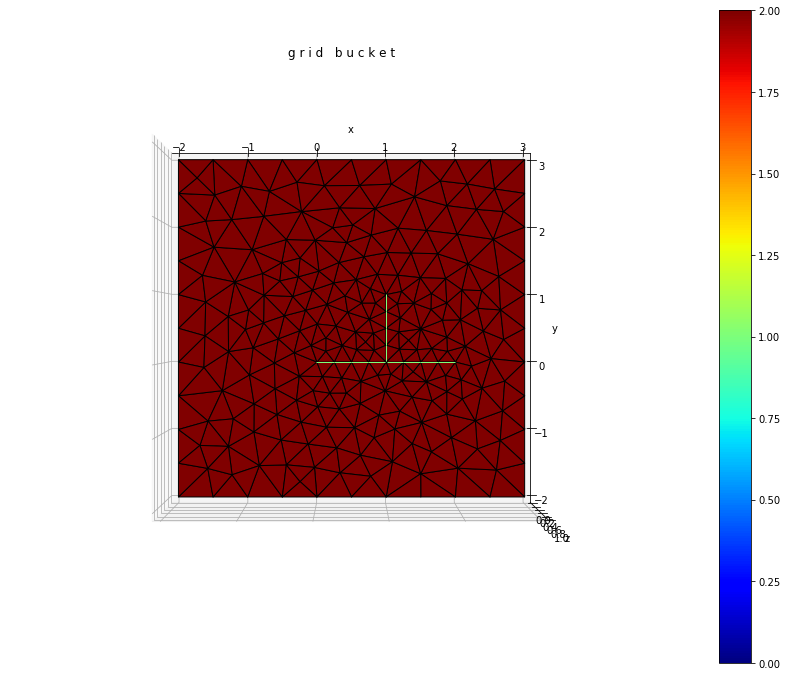

In [5]:
gb1 = example_mesh(mesh_size_frac=0.3, mesh_size_bound=0.5, mesh_size_min=0.1)
pp.plot_grid(gb1, "dimension", figsize=(15,12))

## Increase `mesh_size_frac`:

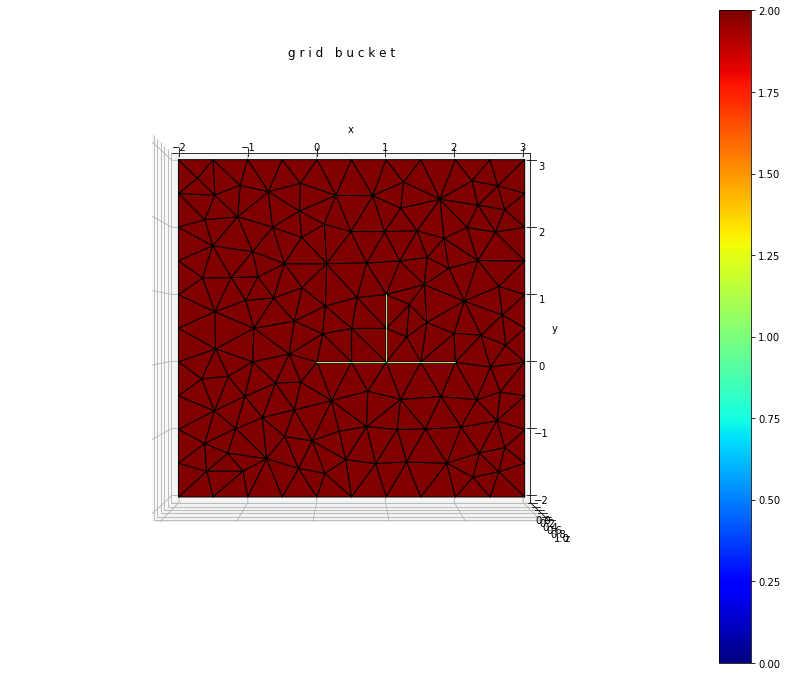

In [6]:
gb1 = example_mesh(mesh_size_frac=0.8, mesh_size_bound=0.5, mesh_size_min=0.1)
pp.plot_grid(gb1, "dimension", figsize=(15,12))

## Increase `mesh_size_min`: 

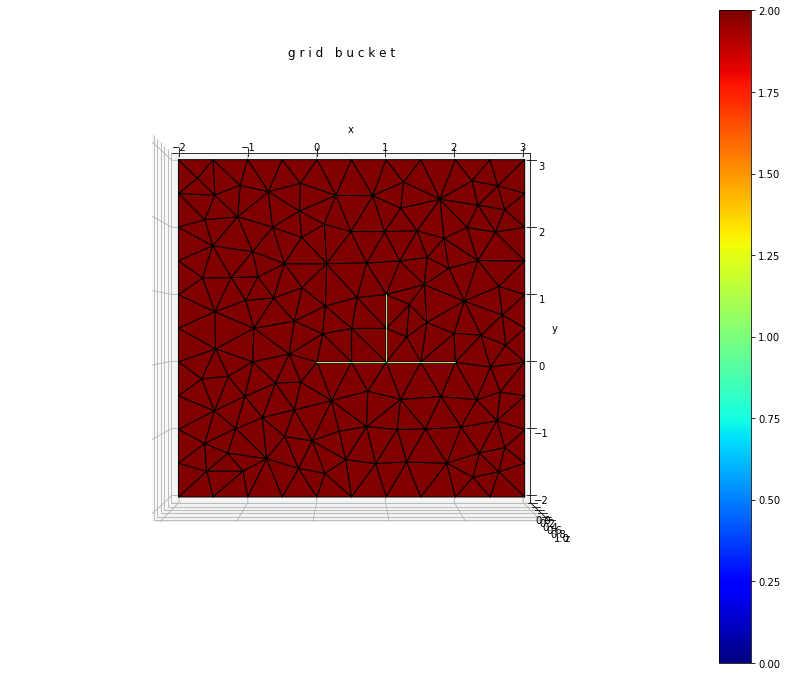

In [7]:
gb3 = example_mesh(mesh_size_frac=0.8, mesh_size_bound=0.5, mesh_size_min=17)
pp.plot_grid(gb3, "dimension", figsize=(15,12))

## Increase `mesh_size_bound`: 

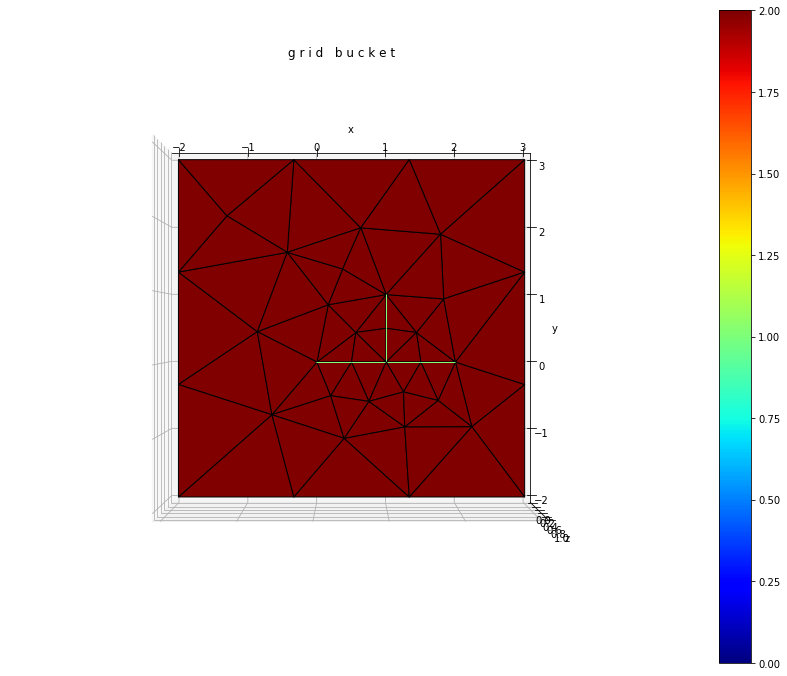

In [8]:
gb1 = example_mesh(mesh_size_frac=0.8, mesh_size_bound=2, mesh_size_min=1)
pp.plot_grid(gb1, "dimension", figsize=(15,12))